# Vascular Surgery Project w/ Mel for AOA Conference 2025

## Importing libraries

In [14]:
from pathlib import Path
import unittest
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

## Defining Paths

In [2]:
inspire_path = Path("/home/server/Projects/data/INSPIRE/physionet.org/files/inspire/1.3")
ops_path = inspire_path / "operations.csv"
labs_path = inspire_path / "labs.csv"
vitals_path = inspire_path / "vitals.csv"
ward_vitals_path = inspire_path / "ward_vitals.csv"
meds_path = inspire_path / "medications.csv"
diagnosis_path = inspire_path / "diagnosis.csv"
combined_path = inspire_path / "combined_data.csv"
combined_cleaned_path = inspire_path / "combined_cleaned_data.csv"
pca_path = inspire_path / "pca_data.csv"

df_operations = pd.read_csv(ops_path.as_posix())
df_meds = pd.read_csv(meds_path.as_posix())
df_diagnosis = pd.read_csv(diagnosis_path.as_posix())
df_ward_vitals = pd.read_csv(ward_vitals_path.as_posix())
df_lab = pd.read_csv(labs_path.as_posix())

/tmp/ipykernel_2199/465707517.py:13: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meds = pd.read_csv(meds_path.as_posix())


## Saving Important Variables and Results

This saves important variables and results so everything doesn't have to be rerun every time the Kernel resets

In [15]:
def save_data(dataframes_dict, results_dict, base_path='saved_data'):
    """
    Save dataframes and results to pickle files with error handling.
    
    Args:
        dataframes_dict (dict): Dictionary of dataframes to save
        results_dict (dict): Dictionary of results/statistics to save
        base_path (str): Base directory for saving files
    """
    try:
        # Create directory if it doesn't exist
        if not os.path.exists(base_path):
            os.makedirs(base_path)
            
        # Save dataframes
        for name, df in dataframes_dict.items():
            try:
                df.to_pickle(f'{base_path}/{name}.pkl')
            except Exception as e:
                print(f"Error saving dataframe {name}: {str(e)}")
                
        # Save results dictionary
        try:
            with open(f'{base_path}/results.pkl', 'wb') as f:
                pickle.dump(results_dict, f)
        except Exception as e:
            print(f"Error saving results dictionary: {str(e)}")
            
        print("Data successfully saved")
        
    except Exception as e:
        print(f"Error in save operation: {str(e)}")

# Prepare data to save
dfs_to_save = {
    'df_04r00': df_04r00,  
    'df_operations': df_operations,
    'df_meds': df_meds,
    'df_diagnosis': df_diagnosis,
    'df_lab': df_lab,
    'df_ward_vitals': df_ward_vitals
}

results_to_save = {
    'stats': stats,  # Basic statistics
    'sex_counts': sex_counts,  # Sex distribution 
    'mfi_scores': mfi_scores,  # Modified Frailty Index scores
    'asa_stats': asa_stats,  # ASA score statistics
    'outcomes': outcomes  # Mortality and LOS outcomes
}

# Execute save operation
save_data(dfs_to_save, results_to_save)

Data successfully saved


## Variable/Results Loading

This loads the previously saved variables/results after kernel reset

In [ ]:
# Code chunk 2: Load data
def load_data(base_path='saved_data'):
    """
    Load saved dataframes and results from pickle files with error handling.
    
    Args:
        base_path (str): Base directory for loading files
        
    Returns:
        tuple: (loaded_dataframes, loaded_results)
    """
    loaded_dfs = {}
    loaded_results = None
    
    try:
        # Load dataframes
        for name in ['df_04r00', 'df_operations', 'df_meds', 'df_diagnosis', 'df_lab', 'df_ward_vitals']:
            try:
                loaded_dfs[name] = pd.read_pickle(f'{base_path}/{name}.pkl')
            except Exception as e:
                print(f"Error loading dataframe {name}: {str(e)}")
                
        # Load results
        try:
            with open(f'{base_path}/results.pkl', 'rb') as f:
                loaded_results = pickle.load(f)
        except Exception as e:
            print(f"Error loading results dictionary: {str(e)}")
            
        print("Data successfully loaded")
        
    except Exception as e:
        print(f"Error in load operation: {str(e)}")
        
    return loaded_dfs, loaded_results

# Execute load operation
loaded_dfs, loaded_results = load_data()

# Restore individual dataframes and results if load was successful
if loaded_dfs and loaded_results:
    try:
        df_04r00 = loaded_dfs['df_04r00']
        df_operations = loaded_dfs['df_operations']
        df_meds = loaded_dfs['df_meds']
        df_diagnosis = loaded_dfs['df_diagnosis']
        df_lab = loaded_dfs['df_lab']
        df_ward_vitals = loaded_dfs['df_ward_vitals']
        
        stats = loaded_results['stats']
        sex_counts = loaded_results['sex_counts']
        mfi_scores = loaded_results['mfi_scores']
        asa_stats = loaded_results['asa_stats']
        outcomes = loaded_results['outcomes']
        
        print("Variables successfully restored")
        
    except Exception as e:
        print(f"Error restoring variables: {str(e)}")

## Exploratory Statistics for medications.csv

In [3]:

# Display first 5 rows
print("\nFirst 5 rows of medications data:")
print(df_meds.head())

# Display basic information
print("\nDataframe Info:")
print(df_meds.info())

# Display column names and sample values
print("\nColumn names and sample values:")
for col in df_meds.columns:
    print(f"\n{col}:")
    print(df_meds[col].value_counts().head(3))


First 5 rows of medications data:
   subject_id  chart_time      drug_name route drug_name2 drug_name3 atc_code  \
0   117512122     2832985     pregabalin    po        NaN        NaN  N03AX16   
1   117512122     2833610     pregabalin    po        NaN        NaN  N03AX16   
2   117512122     2832985  levetiracetam    po        NaN        NaN  N03AX14   
3   117512122     2833610  levetiracetam    po        NaN        NaN  N03AX14   
4   117512122     2832985     famotidine    po        NaN        NaN  A02BA03   

  atc_code2 atc_code3  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9885572 entries, 0 to 9885571
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   subject_id  int64 
 1   chart_time  int64 
 2   drug_name   object
 3   route       object
 4   drug_name2  object
 5   drug_name3  object
 6   atc_code

## Find total # of patients w/ ICD-10-PCS code of 04R00

In [4]:
# Count operations with ICD-10-PCS code '04R00'
count_04r00 = df_operations[df_operations['icd10_pcs'] == '04R00'].shape[0]
print(f"Number of operations with ICD-10-PCS code '04R00': {count_04r00}")

Number of operations with ICD-10-PCS code '04R00': 217


## Check how many patients had a preexisting nicotine dependence

In [5]:
# First get patients with 04r00 procedure
df_04r00 = df_operations[df_operations['icd10_pcs'] == '04R00']
patients_04r00 = set(df_04r00['subject_id'].unique())

# Filter for F17 diagnoses (nicotine dependence)
df_f17 = df_diagnosis[df_diagnosis['icd10_cm'].str.startswith('F17', na=False)]

# Find intersection of patients with 04r00 and F17 diagnosis
patients_with_f17 = set(df_f17['subject_id'].unique())
patients_04r00_with_f17 = patients_04r00.intersection(patients_with_f17)

# Calculate statistics
total_04r00 = len(patients_04r00)
total_with_f17 = len(patients_04r00_with_f17)
percentage = (total_with_f17 / total_04r00) * 100

print(f"\nStatistics:")
print(f"Total patients with 04R00 procedure: {total_04r00}")
print(f"Patients with both 04R00 and F17 diagnosis: {total_with_f17}")
print(f"Percentage of 04R00 patients with F17: {percentage:.1f}%")


Statistics:
Total patients with 04R00 procedure: 213
Patients with both 04R00 and F17 diagnosis: 0
Percentage of 04R00 patients with F17: 0.0%


## Pull Pre-Operation labs for patients undergoing surgery 04R00

In [6]:
# Start with the 04r00 procedures dataframe
df = df_04r00.copy()

# Get unique lab test names
necessary_vars_labs = df_lab['item_name'].unique().tolist()
print("Lab variables to process:", len(necessary_vars_labs))

# Process each lab test
for item_name in necessary_vars_labs:
    # Merge lab values with surgical data
    df = pd.merge_asof(df.sort_values('orin_time'), 
                    df_lab.loc[df_lab['item_name'] == item_name].sort_values('chart_time'), 
                    left_on='orin_time', right_on='chart_time', by='subject_id', 
                    tolerance=6* 30 * 24 * 60, suffixes=('', '_'))
    
    # Clean up merged data
    df.drop(columns=['chart_time', 'item_name'], inplace=True, errors='ignore')
    df.rename(columns={'value':f'preop_{item_name}'}, inplace=True)

# Convert sex to boolean
df['sex'] = df['sex'] == 'M'

print(f"Final dataframe shape: {df.shape}")

Lab variables to process: 38
Final dataframe shape: (217, 67)


## Check how many patients were preoperatively anemic 

Using WHO guidelines: 
- Male <13 Hb
- Female <12 Hb


Sex distribution (True=Male, False=Female):
sex
True     144
False     73
Name: count, dtype: int64

Preop Hb stats:
       count       mean       std  min   25%   50%   75%   max
sex                                                           
False   73.0  11.736986  1.608269  8.1  10.7  11.6  12.9  15.0
True   142.0  13.040845  1.787790  7.6  11.9  13.2  14.2  15.6

Overall Anemia Statistics:
Total patients with Hb values: 215
Number of anemic patients: 106
Percentage anemic: 49.3%

Male patients:
Total with Hb values: 142
Number anemic: 63
Percentage anemic: 44.4%
Mean Hb: 13.0

Female patients:
Total with Hb values: 73
Number anemic: 43
Percentage anemic: 58.9%
Mean Hb: 11.7


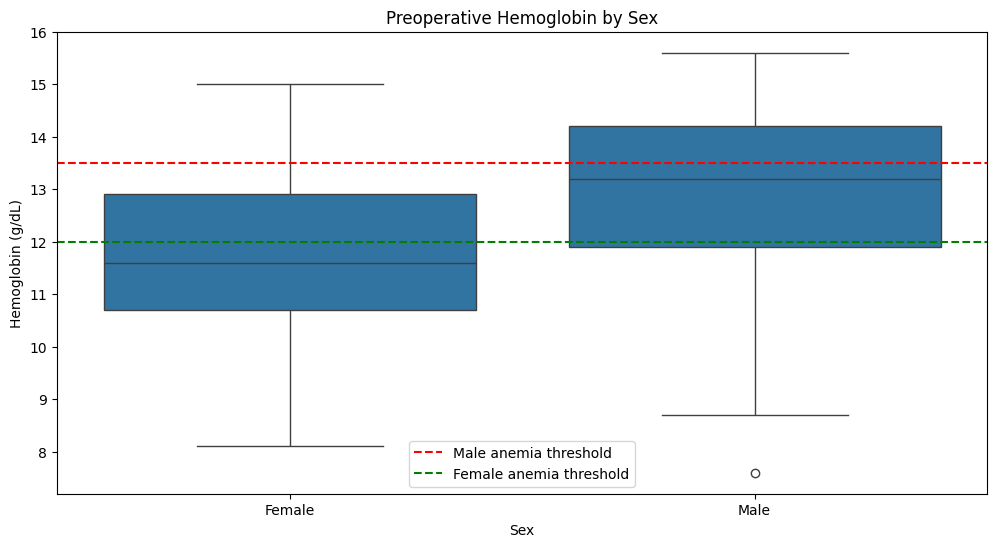

In [16]:
# Verify data structure
print("\nSex distribution (True=Male, False=Female):")
print(df['sex'].value_counts())
print("\nPreop Hb stats:")
print(df.groupby('sex')['preop_hb'].describe())

# Create anemia flag using boolean sex
df['is_anemic'] = df.apply(
    lambda x: (x['preop_hb'] < 13 if x['sex'] else x['preop_hb'] < 12.0) 
    if pd.notnull(x['preop_hb']) else np.nan, axis=1
)

# Overall statistics
total_with_hb = df['preop_hb'].notna().sum()
anemic_count = df['is_anemic'].sum()
anemic_percentage = (anemic_count / total_with_hb) * 100

print(f"\nOverall Anemia Statistics:")
print(f"Total patients with Hb values: {total_with_hb}")
print(f"Number of anemic patients: {anemic_count}")
print(f"Percentage anemic: {anemic_percentage:.1f}%")

# Sex-specific statistics
for is_male in [True, False]:
    sex_label = 'Male' if is_male else 'Female'
    sex_patients = df[df['sex'] == is_male]
    sex_total = sex_patients['preop_hb'].notna().sum()
    sex_anemic = sex_patients['is_anemic'].sum()
    sex_percentage = (sex_anemic / sex_total * 100) if sex_total > 0 else 0
    
    print(f"\n{sex_label} patients:")
    print(f"Total with Hb values: {sex_total}")
    print(f"Number anemic: {sex_anemic}")
    print(f"Percentage anemic: {sex_percentage:.1f}%")
    print(f"Mean Hb: {sex_patients['preop_hb'].mean():.1f}")

# Visualization with proper labels
plt.figure(figsize=(12, 6))
df['sex_label'] = df['sex'].map({True: 'Male', False: 'Female'})
sns.boxplot(data=df, x='sex_label', y='preop_hb')
plt.axhline(y=13.5, color='r', linestyle='--', label='Male anemia threshold')
plt.axhline(y=12.0, color='g', linestyle='--', label='Female anemia threshold')
plt.title('Preoperative Hemoglobin by Sex')
plt.xlabel('Sex')
plt.ylabel('Hemoglobin (g/dL)')
plt.legend()
plt.show()

## Calculate Pre-Op eGFR & CKD

Using 2021 CKD-EPI equation

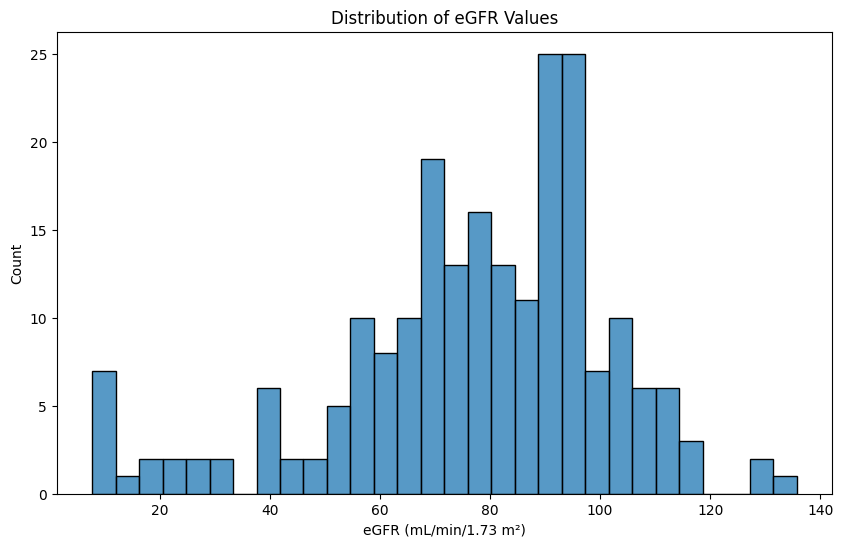


eGFR Statistics:
Mean: 77.17
Median: 80.40
Std Dev: 24.92
Min: 7.75
Max: 135.70

CKD Stage Distribution:
Stage 1 (≥90): 74 patients (34.1%)
Stage 2 (60-89): 99 patients (45.6%)
Stage 3a (45-59): 20 patients (9.2%)
Stage 3b (30-44): 9 patients (4.1%)
Stage 4 (15-29): 6 patients (2.8%)
Stage 5 (<15): 8 patients (3.7%)


In [8]:
# First get the data we need
df['preop_cr'] = df['preop_creatinine']  # Assuming values are in mg/dL
df['sex_binary'] = df['sex']  # True is male, False is female from previous analysis

def calculate_egfr(creatinine, age, is_male):
    # Return None if creatinine is missing
    if pd.isna(creatinine):
        return None
        
    # Set constants based on sex
    if is_male:
        k = 0.9
        a = -0.302
    else:
        k = 0.7
        a = -0.241
    
    # Calculate min and max terms
    min_term = min(creatinine/k, 1)
    max_term = max(creatinine/k, 1)
    
    # Calculate eGFR using CKD-EPI equation
    egfr = 142 * (min_term**a) * (max_term**-1.200) * (0.9938**age)
    
    # Add female multiplication factor
    if not is_male:
        egfr *= 1.012
        
    return egfr

# Calculate eGFR for each patient
df['egfr'] = df.apply(lambda x: calculate_egfr(x['preop_cr'], x['age'], x['sex_binary']), axis=1)

# Create histogram of eGFR distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='egfr', bins=30)
plt.title('Distribution of eGFR Values')
plt.xlabel('eGFR (mL/min/1.73 m²)')
plt.ylabel('Count')
plt.show()

# Print summary statistics
print("\neGFR Statistics:")
print(f"Mean: {df['egfr'].mean():.2f}")
print(f"Median: {df['egfr'].median():.2f}")
print(f"Std Dev: {df['egfr'].std():.2f}")
print(f"Min: {df['egfr'].min():.2f}")
print(f"Max: {df['egfr'].max():.2f}")

# Create CKD stage categories
def ckd_stage(egfr):
    if pd.isna(egfr):
        return None
    elif egfr >= 90:
        return "Stage 1 (≥90)"
    elif egfr >= 60:
        return "Stage 2 (60-89)"
    elif egfr >= 45:
        return "Stage 3a (45-59)"
    elif egfr >= 30:
        return "Stage 3b (30-44)"
    elif egfr >= 15:
        return "Stage 4 (15-29)"
    else:
        return "Stage 5 (<15)"

df['ckd_stage'] = df['egfr'].apply(ckd_stage)

# Count and percentage by CKD stage
ckd_counts = df['ckd_stage'].value_counts().sort_index()
print("\nCKD Stage Distribution:")
for stage, count in ckd_counts.items():
    percentage = (count/len(df))*100
    print(f"{stage}: {count} patients ({percentage:.1f}%)")

## Calculate MFI-5 Score

Ignores functional disability
* 5-item Modified Frailty Index (mFI-5) with 5 key elements:   
  * hypertension requiring medication,   
    * diabetes mellitus (DM),   
    * congestive heart failure,   
    * chronic obstructive pulmonary disease (COPD), and   
    * dependent functional status 

* CD codes  
  * HTN  
    * Essential (primary) hypertension: I10  
      * Hypertension and hypertensive heart disease: I11  
      * Secondary hypertension  
        * I15.0, Renovascular hypertension,   
        * I15.1, Hypertension secondary to other renal disorders,   
        * I15.2, Hypertension secondary to endocrine disorders,   
        * I15.8, Other secondary hypertension,   
        * I15.9, Secondary hypertension, unspecified  
    * DM  
      * E10: T1DM  
      * E11: T2DM  
    * CHF  
      * I50: heart failure  
      * I50.2: systolic heart failure  
      * I50.3: diastolic heart failure   
      * I50.4: Combined systolic and diastolic heart failure  
      * I50.8: other heart failure  
      * I50.0: heart failure, unspecified  
    * COPD  
      * J44.9

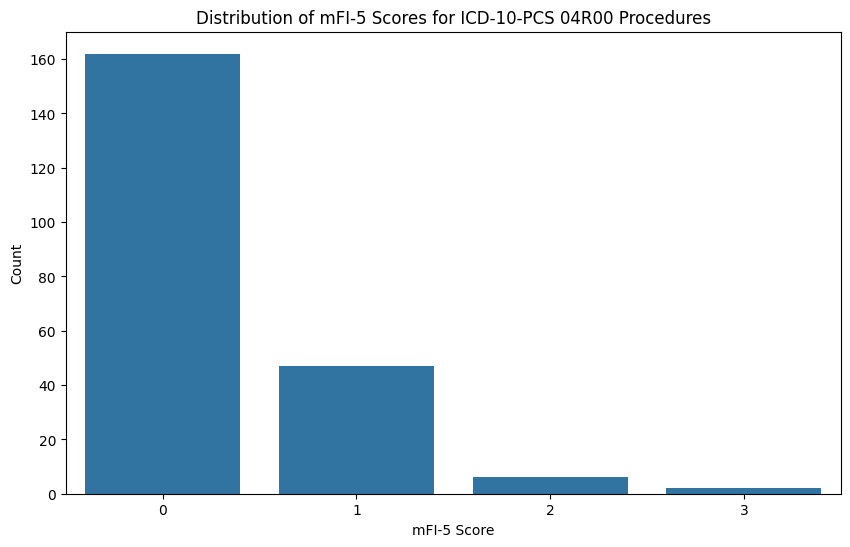


mFI-5 Score Statistics:
Mean: 0.30
Median: 0.00
Std Dev: 0.57
Min: 0.00
Max: 3.00

mFI-5 Score Distribution:
Score 0: 162 patients (74.7%)
Score 1: 47 patients (21.7%)
Score 2: 6 patients (2.8%)
Score 3: 2 patients (0.9%)


In [9]:
# First get patients with 04r00 procedure
df_04r00 = df_operations[df_operations['icd10_pcs'] == '04R00']
patients_04r00 = set(df_04r00['subject_id'].unique())

# Load all diagnoses for these patients
df_04r00_diagnosis = df_diagnosis[df_diagnosis['subject_id'].isin(patients_04r00)]

# Define the ICD-10 codes for each condition
hypertension_codes = ['I10', 'I11', 'I15'] 
diabetes_codes = ['E10', 'E11']
chf_codes = ['I50']
copd_codes = ['J44']

# Dictionary of conditions and their codes
mfi_conditions = {
    'Hypertension': hypertension_codes,
    'Diabetes_Mellitus': diabetes_codes,
    'CHF': chf_codes,
    'COPD': copd_codes
}

# Step 4: Calculate mFI-5 scores
def calculate_mfi_score(codes):
    score = 0
    for condition_codes in mfi_conditions.values():
        if any(any(str(code).startswith(prefix) for prefix in condition_codes) for code in codes):
            score += 1
    return score

mfi_scores = df_04r00_diagnosis.groupby('subject_id')['icd10_cm'].apply(calculate_mfi_score).reset_index(name='mFI_5')

# Step 5: Merge mFI-5 scores with df_04r00
df_04r00 = df_04r00.merge(mfi_scores, on='subject_id', how='left').fillna({'mFI_5': 0})

# Calculate summary statistics for mFI-5
mfi_stats = {
    'Mean': df_04r00['mFI_5'].mean(),
    'Median': df_04r00['mFI_5'].median(),
    'Std Dev': df_04r00['mFI_5'].std(),
    'Min': df_04r00['mFI_5'].min(),
    'Max': df_04r00['mFI_5'].max()
}

# Create distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_04r00, x='mFI_5')
plt.title('Distribution of mFI-5 Scores for ICD-10-PCS 04R00 Procedures')
plt.xlabel('mFI-5 Score')
plt.ylabel('Count')
plt.show()

# Print summary statistics
print("\nmFI-5 Score Statistics:")
for stat, value in mfi_stats.items():
    print(f"{stat}: {value:.2f}")

# Print distribution of scores
print("\nmFI-5 Score Distribution:")
score_counts = df_04r00['mFI_5'].value_counts().sort_index()
for score, count in score_counts.items():
    percentage = (count / len(df_04r00)) * 100
    print(f"Score {int(score)}: {count} patients ({percentage:.1f}%)")

## Check which patients are on dialysis

ward_vitals.csv: crrt = 1

In [10]:
# Filter for 04R00 procedures first to get patient IDs
patients_04r00 = set(df_04r00['subject_id'].unique())

# Filter ward_vitals for CRRT records and these patients
crrt_data = df_ward_vitals[
    (df_ward_vitals['item_name'] == 'crrt') & 
    (df_ward_vitals['subject_id'].isin(patients_04r00))
]

# Count unique patients with CRRT = 1
crrt_patients = crrt_data[crrt_data['value'] == 1]['subject_id'].nunique()

# Calculate percentage
total_patients = len(patients_04r00)
crrt_percentage = (crrt_patients / total_patients) * 100

print(f"\nCRRT Statistics for 04R00 Procedures:")
print(f"Total patients: {total_patients}")
print(f"Patients with CRRT: {crrt_patients}")
print(f"Percentage on CRRT: {crrt_percentage:.1f}%")

# Let's also look at the distribution of CRRT values
print("\nCRRT Value Distribution:")
value_counts = crrt_data['value'].value_counts().sort_index()
for value, count in value_counts.items():
    print(f"Value {value}: {count} records")


CRRT Statistics for 04R00 Procedures:
Total patients: 213
Patients with CRRT: 33
Percentage on CRRT: 15.5%

CRRT Value Distribution:
Value 1.0: 3936 records


## Age, BMI, and Sex for patient population w/ 04R00 Procedure

/tmp/ipykernel_2199/341673426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_04r00['bmi'] = df_04r00['weight'] / ((df_04r00['height']/100) ** 2)


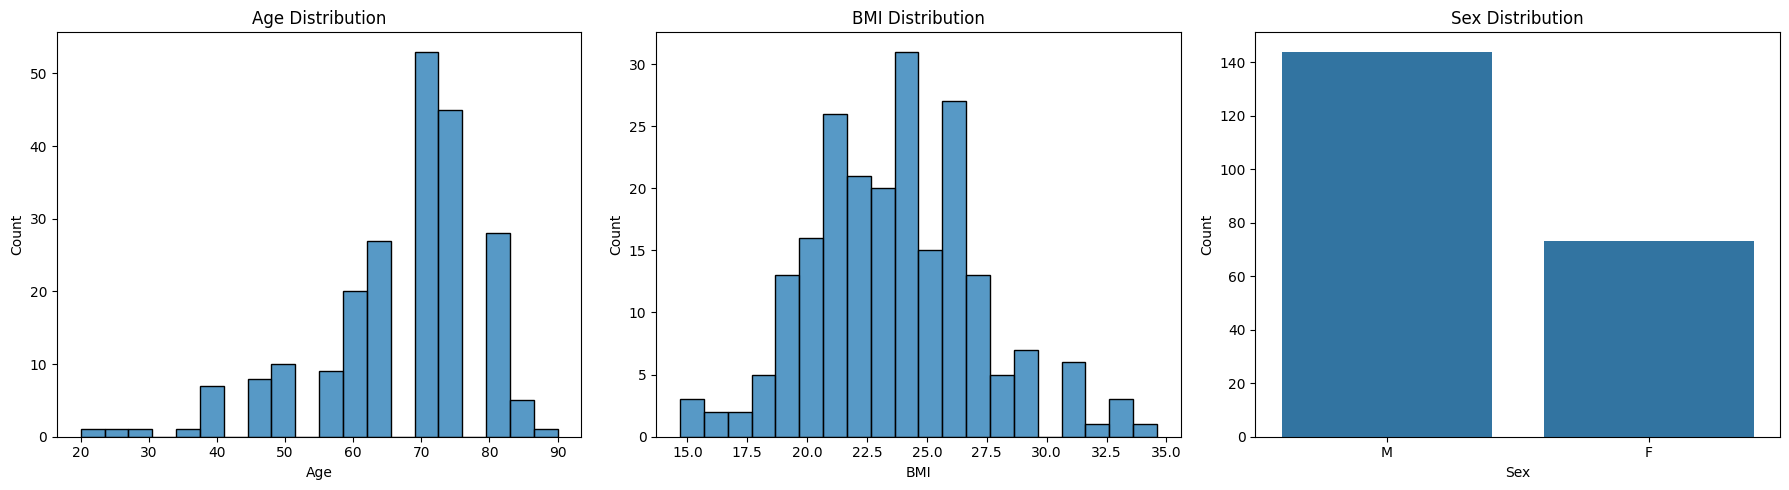


Age Statistics:
Mean: 67.00
Median: 70.00
Std Dev: 11.95
Min: 20.00
Max: 90.00

BMI Statistics:
Mean: 23.64
Median: 23.78
Std Dev: 3.50
Min: 14.69
Max: 34.60

Sex Distribution:
M: 144 patients (66.4%)
F: 73 patients (33.6%)


In [11]:
# Filter for 04R00 procedures
df_04r00 = df_operations[df_operations['icd10_pcs'] == '04R00']

# Calculate BMI
df_04r00['bmi'] = df_04r00['weight'] / ((df_04r00['height']/100) ** 2)

# Age and BMI statistics
stats = {
    'Age': {
        'Mean': df_04r00['age'].mean(),
        'Median': df_04r00['age'].median(), 
        'Std Dev': df_04r00['age'].std(),
        'Min': df_04r00['age'].min(),
        'Max': df_04r00['age'].max()
    },
    'BMI': {
        'Mean': df_04r00['bmi'].mean(),
        'Median': df_04r00['bmi'].median(),
        'Std Dev': df_04r00['bmi'].std(), 
        'Min': df_04r00['bmi'].min(),
        'Max': df_04r00['bmi'].max()
    }
}

# Sex distribution
sex_counts = df_04r00['sex'].value_counts()
sex_percentages = df_04r00['sex'].value_counts(normalize=True) * 100

# Create plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Age histogram
sns.histplot(data=df_04r00, x='age', bins=20, ax=ax1)
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

# BMI histogram
sns.histplot(data=df_04r00, x='bmi', bins=20, ax=ax2)
ax2.set_title('BMI Distribution')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Count')

# Sex distribution bar plot
sns.barplot(x=sex_counts.index, y=sex_counts.values, ax=ax3)
ax3.set_title('Sex Distribution')
ax3.set_xlabel('Sex')
ax3.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print summary statistics
for metric, stats_dict in stats.items():
    print(f"\n{metric} Statistics:")
    for stat, value in stats_dict.items():
        print(f"{stat}: {value:.2f}")

print("\nSex Distribution:")
for sex, count in sex_counts.items():
    percentage = sex_percentages[sex]
    print(f"{sex}: {count} patients ({percentage:.1f}%)")

## ASA Score for Patients w/ 04R00

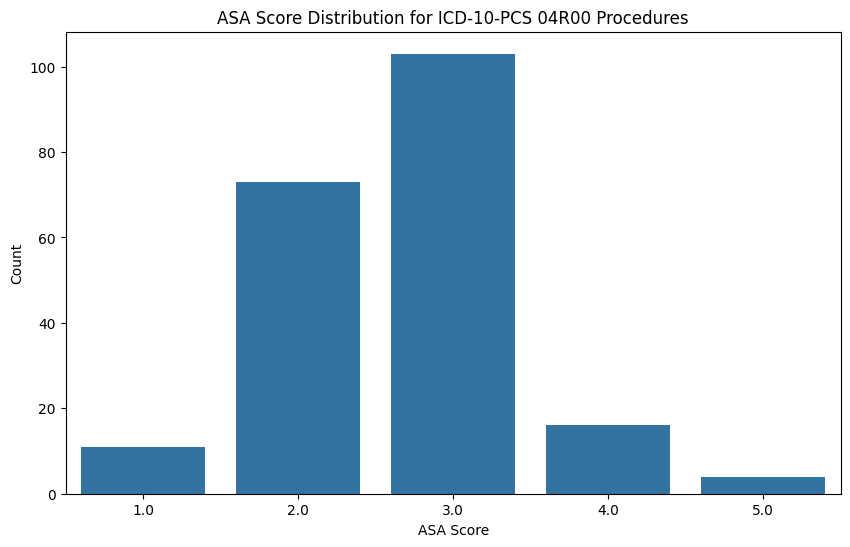


ASA Score Statistics:
Mean: 2.66
Median: 3.00
Std Dev: 0.78
Min: 1.00
Max: 5.00

ASA Score Distribution:
ASA 1.0: 11 patients (5.1%)
ASA 2.0: 73 patients (33.6%)
ASA 3.0: 103 patients (47.5%)
ASA 4.0: 16 patients (7.4%)
ASA 5.0: 4 patients (1.8%)


In [12]:
# Filter for 04R00 procedures and get ASA scores
df_04r00_asa = df_operations[df_operations['icd10_pcs'] == '04R00']['asa']

# Calculate statistics for ASA scores
asa_stats = {
    'Mean': df_04r00_asa.mean(),
    'Median': df_04r00_asa.median(),
    'Std Dev': df_04r00_asa.std(),
    'Min': df_04r00_asa.min(),
    'Max': df_04r00_asa.max()
}

# Get ASA score distribution
asa_counts = df_04r00_asa.value_counts().sort_index()

# Create visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df_operations[df_operations['icd10_pcs'] == '04R00'], x='asa', 
              order=[1.0, 2.0, 3.0, 4.0, 5.0])
plt.title('ASA Score Distribution for ICD-10-PCS 04R00 Procedures')
plt.xlabel('ASA Score')
plt.ylabel('Count')
plt.show()

# Print summary statistics
print("\nASA Score Statistics:")
for stat, value in asa_stats.items():
    print(f"{stat}: {value:.2f}")

print("\nASA Score Distribution:")
for score, count in asa_counts.items():
    percentage = (count / len(df_04r00_asa)) * 100
    print(f"ASA {score}: {count} patients ({percentage:.1f}%)")


In-Hospital Mortality:
Count: 11
Rate: 5.07
Mean Time to Death (days): 121.03
Median Time to Death (days): 33.55

All-Cause Mortality:
Count: 67
Rate: 30.88
Mean Time to Death (days): 1330.59
Median Time to Death (days): 913.40

Post-Op LOS:
Mean (days): 25.43
Median (days): 15.33
Std Dev (days): 46.60

ICU Stats:
ICU Admission Rate: 98.62
Mean LOS (days): 4.43
Median LOS (days): 2.99
Std Dev (days): 5.03


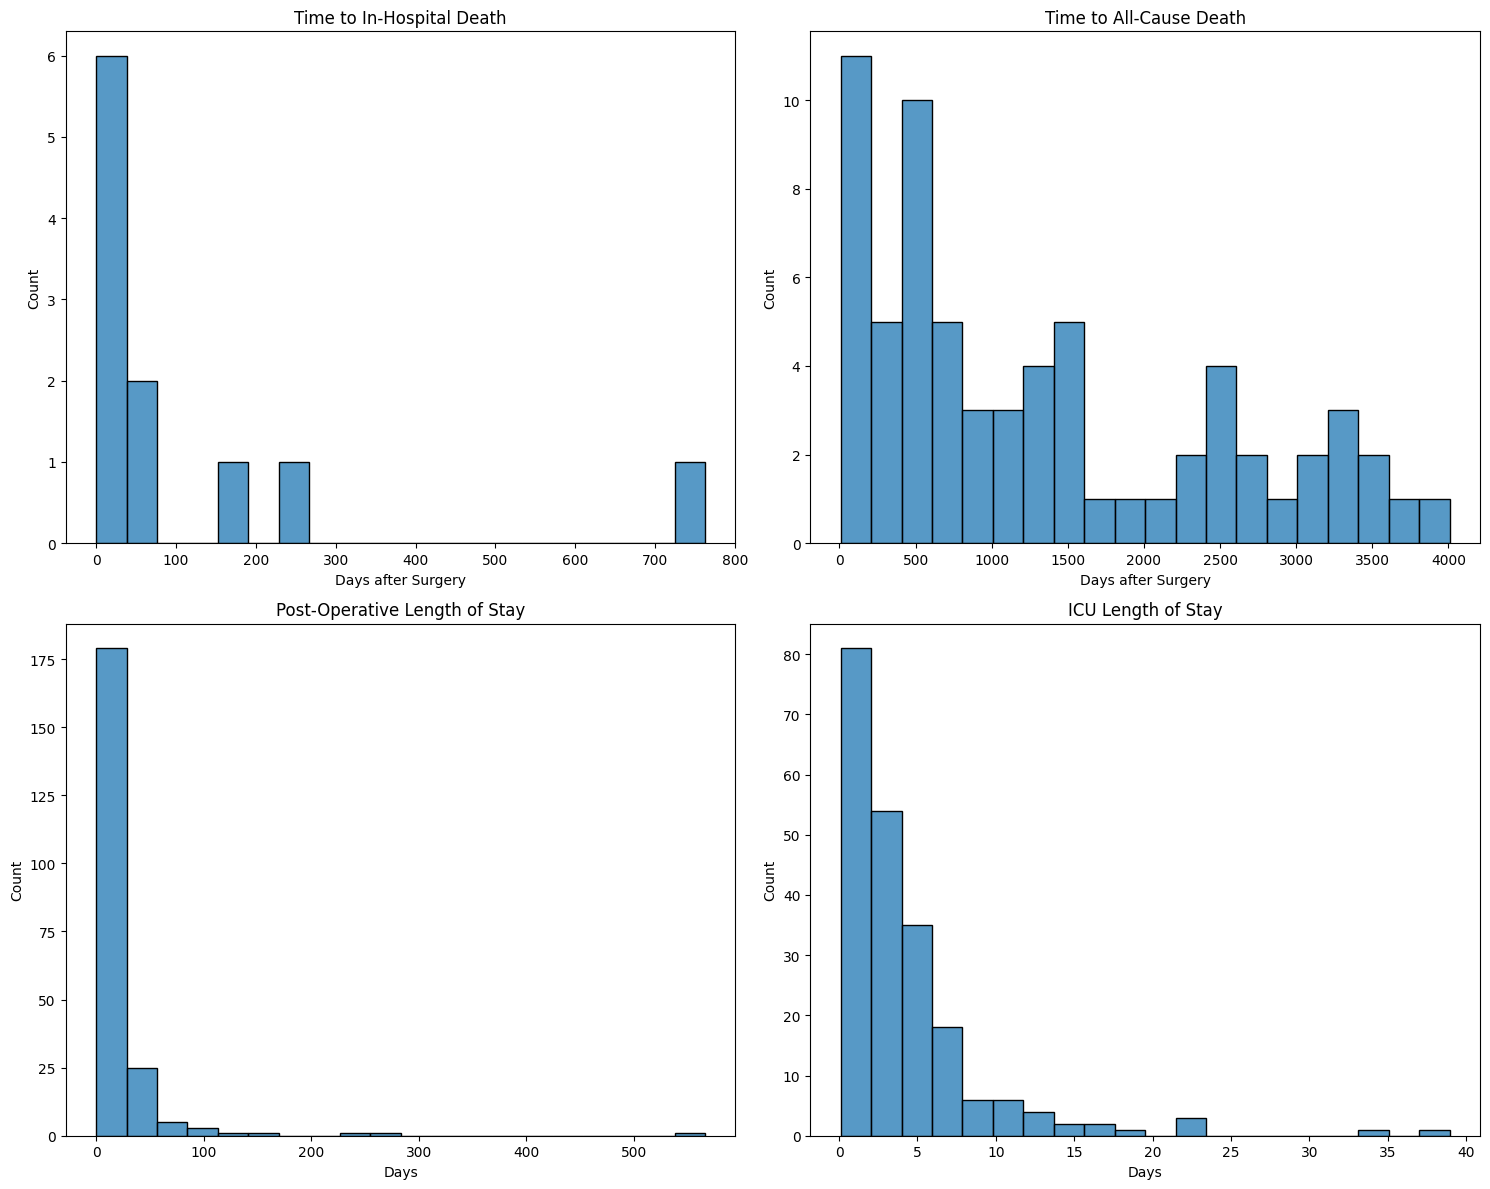

In [13]:
# Filter for 04R00 procedures
df_04r00 = df_operations[df_operations['icd10_pcs'] == '04R00'].copy()

# Calculate outcome measures
df_04r00['postop_los'] = (df_04r00['discharge_time'] - df_04r00['opend_time']) / (24 * 60)  # Convert minutes to days
df_04r00['icu_los'] = (df_04r00['icuout_time'] - df_04r00['icuin_time']) / (24 * 60)  # Convert minutes to days
df_04r00['time_to_inhosp_death'] = (df_04r00['inhosp_death_time'] - df_04r00['opend_time']) / (24 * 60)  # Days after surgery
df_04r00['time_to_allcause_death'] = (df_04r00['allcause_death_time'] - df_04r00['opend_time']) / (24 * 60)  # Days after surgery

# Calculate summary statistics
outcomes = {
    'In-Hospital Mortality': {
        'Count': df_04r00['inhosp_death_time'].notna().sum(),
        'Rate': (df_04r00['inhosp_death_time'].notna().sum() / len(df_04r00)) * 100,
        'Mean Time to Death (days)': df_04r00['time_to_inhosp_death'].mean(),
        'Median Time to Death (days)': df_04r00['time_to_inhosp_death'].median()
    },
    'All-Cause Mortality': {
        'Count': df_04r00['allcause_death_time'].notna().sum(),
        'Rate': (df_04r00['allcause_death_time'].notna().sum() / len(df_04r00)) * 100,
        'Mean Time to Death (days)': df_04r00['time_to_allcause_death'].mean(),
        'Median Time to Death (days)': df_04r00['time_to_allcause_death'].median()
    },
    'Post-Op LOS': {
        'Mean (days)': df_04r00['postop_los'].mean(),
        'Median (days)': df_04r00['postop_los'].median(),
        'Std Dev (days)': df_04r00['postop_los'].std()
    },
    'ICU Stats': {
        'ICU Admission Rate': (df_04r00['icuin_time'].notna().sum() / len(df_04r00)) * 100,
        'Mean LOS (days)': df_04r00['icu_los'].mean(),
        'Median LOS (days)': df_04r00['icu_los'].median(),
        'Std Dev (days)': df_04r00['icu_los'].std()
    }
}

# Print results
for category, stats in outcomes.items():
    print(f"\n{category}:")
    for metric, value in stats.items():
        if isinstance(value, float):
            print(f"{metric}: {value:.2f}")
        else:
            print(f"{metric}: {value}")

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Survival times for in-hospital deaths
sns.histplot(data=df_04r00[df_04r00['time_to_inhosp_death'].notna()], 
             x='time_to_inhosp_death', bins=20, ax=ax1)
ax1.set_title('Time to In-Hospital Death')
ax1.set_xlabel('Days after Surgery')

# Plot 2: Survival times for all-cause deaths
sns.histplot(data=df_04r00[df_04r00['time_to_allcause_death'].notna()], 
             x='time_to_allcause_death', bins=20, ax=ax2)
ax2.set_title('Time to All-Cause Death')
ax2.set_xlabel('Days after Surgery')

# Plot 3: Post-operative LOS
sns.histplot(data=df_04r00, x='postop_los', bins=20, ax=ax3)
ax3.set_title('Post-Operative Length of Stay')
ax3.set_xlabel('Days')

# Plot 4: ICU LOS
sns.histplot(data=df_04r00[df_04r00['icu_los'].notna()], 
             x='icu_los', bins=20, ax=ax4)
ax4.set_title('ICU Length of Stay')
ax4.set_xlabel('Days')

plt.tight_layout()
plt.show()